<a href="https://colab.research.google.com/github/nhutd107/CNN_BT_AI/blob/main/NhanBietDoAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [23]:
folder = '/content/drive/MyDrive/ThuMuc_DuLieuDeTrain/DoAn/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('PHO'):
     output= 1.0
  if file.startswith('MIQUANG'):
    output= 2.0
  if file.startswith('HUTIEU'):
    output= 3.0
  if file.startswith('COMTAM'):
    output= 4.0
  if file.startswith('CAKHO'):
    output= 5.0
  if file.startswith('BUNRIEU'):
    output= 6.0
  if file.startswith('BUNBOHUE'):
    output= 7.0
  if file.startswith('BANHXEO'):
    output= 8.0
  if file.startswith('BANHTET'):
    output= 9.0
  if file.startswith('BANHMI'):
    output= 10.0

  photo = load_img(folder + file, target_size= (96,72))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [24]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/Data_DoAn/DoAn_photos.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/Data_DoAn/DoAn_labels.npy', labels)


(2739, 96, 72, 3) (2739,)


In [25]:
# Split data into train & test
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [26]:
print(test_x.shape, train_x.shape)

(136, 96, 72, 3) (2603, 96, 72, 3)


In [27]:
train_x = train_x.reshape((2603, 96, 72, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((136, 96, 72, 3))
test_x = test_x.astype('float32')/255

In [28]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,11)
test_y = to_categorical(test_y,11)

In [29]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 50
classes = 11

In [30]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (96, 72, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [31]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 96, 72, 32)        896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 96, 72, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 36, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 36, 64)        36928     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 48, 36, 64)        0         
                                                      

In [32]:

#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/50
41/41 [==============================] - 18s 68ms/step - loss: 2.3786 - accuracy: 0.1456
Epoch 2/50
41/41 [==============================] - 2s 39ms/step - loss: 2.2530 - accuracy: 0.1721
Epoch 3/50
41/41 [==============================] - 2s 38ms/step - loss: 2.2323 - accuracy: 0.1813
Epoch 4/50
41/41 [==============================] - 2s 38ms/step - loss: 2.0695 - accuracy: 0.2689
Epoch 5/50
41/41 [==============================] - 2s 38ms/step - loss: 2.0128 - accuracy: 0.2808
Epoch 6/50
41/41 [==============================] - 2s 39ms/step - loss: 1.8553 - accuracy: 0.3484
Epoch 7/50
41/41 [==============================] - 2s 38ms/step - loss: 1.8418 - accuracy: 0.3588
Epoch 8/50
41/41 [==============================] - 2s 39ms/step - loss: 1.7299 - accuracy: 0.4065
Epoch 9/50
41/41 [==============================] - 2s 40ms/step - loss: 1.5848 - accuracy: 0.4529
Epoch 10/50
41/41 [==============================] - 2s 40ms/step - loss: 1.4812 - accuracy: 0.4898
Epoch 11

In [33]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

5/5 [==============================] - 1s 64ms/step - loss: 7.5138 - accuracy: 0.3750
Test accuracy: 0.375


In [34]:
model.save('/content/drive/MyDrive/Colab Notebooks/Data_DoAn/model_DoAn.h5')

1/1 [==============================] - 0s 20ms/step
10
BANHMI


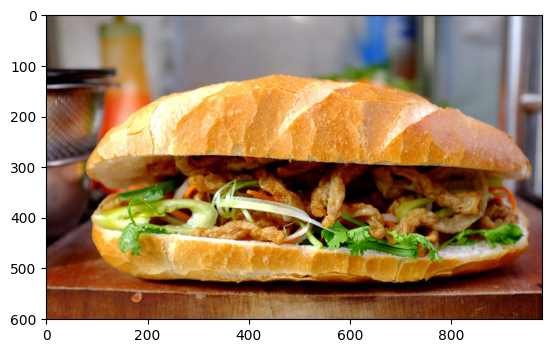

1/1 [==============================] - 0s 20ms/step
5
CAKHO


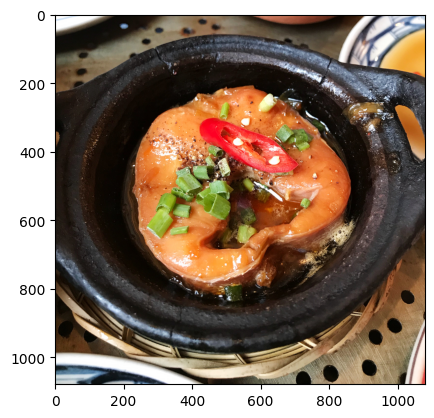

1/1 [==============================] - 0s 20ms/step
6
BUNRIEU


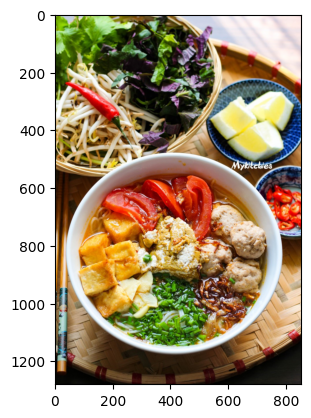

1/1 [==============================] - 0s 22ms/step
7
BUNBOHUE


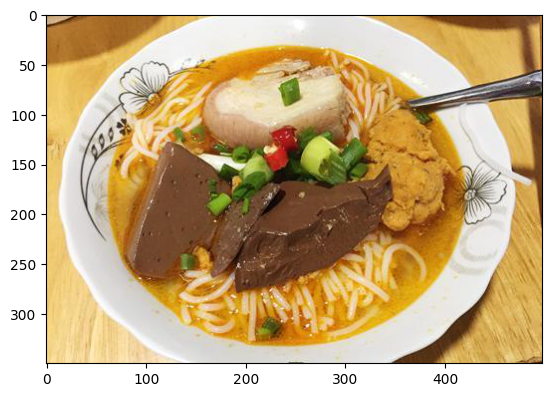

1/1 [==============================] - 0s 28ms/step
8
BANHXEO


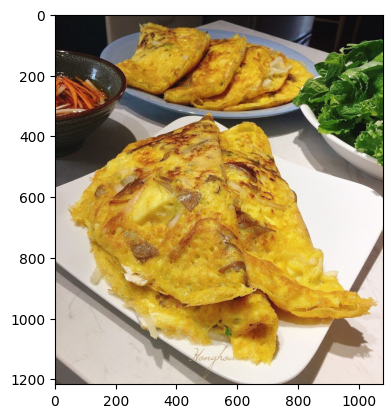

1/1 [==============================] - 0s 19ms/step
9
BANHTET


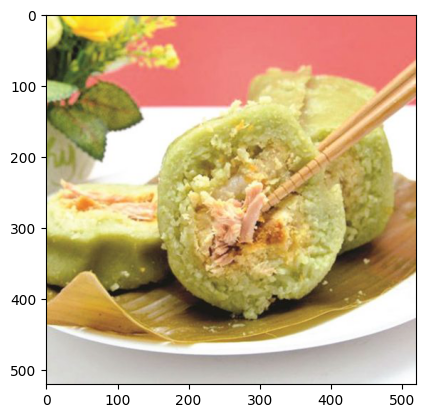

1/1 [==============================] - 0s 18ms/step
2
MIQUANG


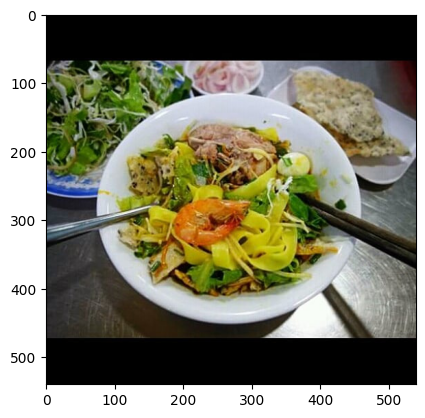

1/1 [==============================] - 0s 22ms/step
3
HUTIEU


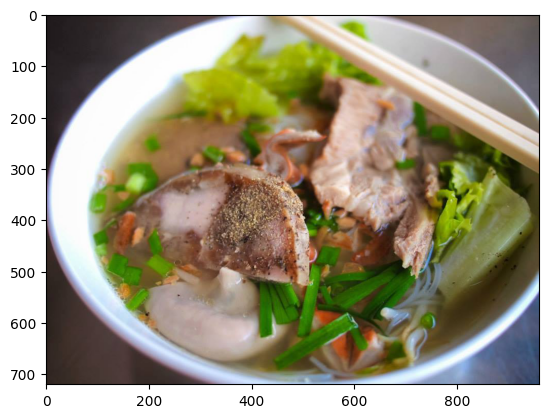

1/1 [==============================] - 0s 20ms/step
4
COMTAM


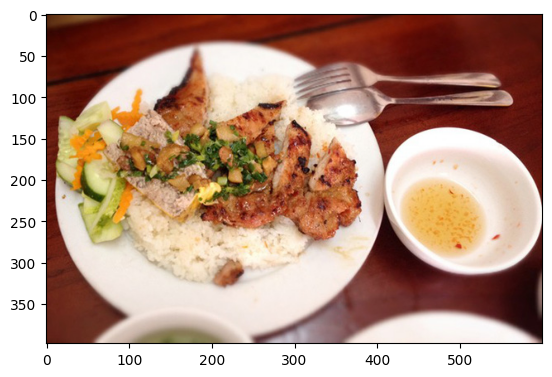

1/1 [==============================] - 0s 21ms/step
1
PHO


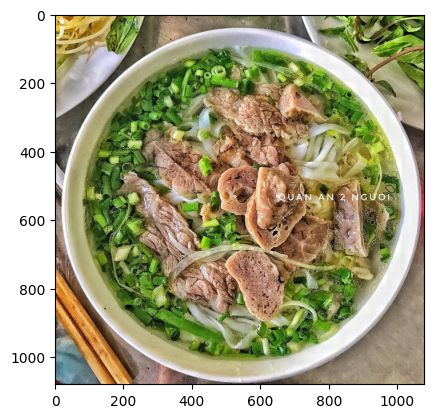

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/ThuMuc_test/Test_DoAn/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (96, 72))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  print(result)
  class_name=['', 'PHO', 'MIQUANG', 'HUTIEU', 'COMTAM', 'CAKHO', 'BUNRIEU', 'BUNBOHUE', 'BANHXEO', 'BANHTET', 'BANHMI']
  print(class_name[result])
  plt.show()